# Sales Analysis

#### Import necessary libraries

In [4]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("data/all_data.csv", index=False)
    

#### Read in updated dataframe

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [7]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


##### Get rid of text in order date column

In [8]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
1494795,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
1494796,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
1494797,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
1494798,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


#### Make columns correct type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


#### Add month column (alternative method)

In [11]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,11


#### Add city column

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,11,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,11,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,11,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,11,Boston (MA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [14]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,87224,1.449415e+07,77672,1.457805e+07
2,107592,1.751108e+07,191600,1.761618e+07
3,136040,2.232966e+07,363672,2.245680e+07
4,164464,2.694137e+07,584928,2.712536e+07
5,149336,2.508100e+07,662640,2.522085e+07
6,122024,2.049620e+07,650592,2.062242e+07
7,128576,2.106032e+07,800408,2.118221e+07
8,107584,1.784276e+07,765504,1.795574e+07
9,104872,1.667994e+07,836712,1.678048e+07


range(1, 13)


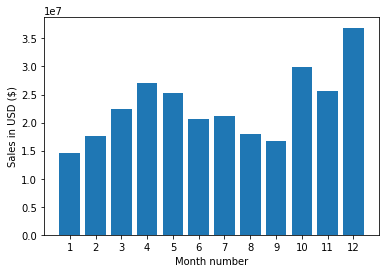

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [16]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),132816,2.223927e+07,838352,838352,2.236399e+07
Austin (TX),89224,1.447899e+07,558632,558632,1.455665e+07
Boston (MA),180224,2.909928e+07,1128896,1128896,2.929314e+07
Dallas (TX),133840,2.202102e+07,836960,836960,2.214380e+07
Los Angeles (CA),266312,4.337148e+07,1666600,1666600,4.362057e+07
New York City (NY),223456,3.708297e+07,1405928,1405928,3.731454e+07
Portland (ME),22000,3.577514e+06,137152,137152,3.598066e+06
Portland (OR),90424,1.488447e+07,564968,564968,1.496586e+07
San Francisco (CA),401912,6.569169e+07,2524160,2524160,6.609763e+07


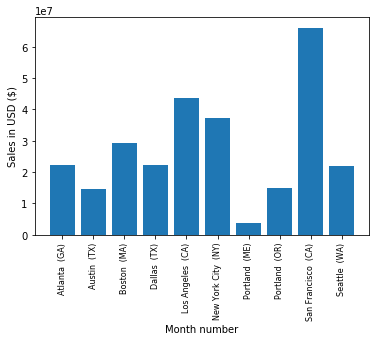

In [17]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [19]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11,New York City (NY),11.99,9,54,1
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,11,Austin (TX),23.90,10,3,1
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,11,Los Angeles (CA),150.00,14,56,1
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,11,Seattle (WA),149.99,22,24,1
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,11,Boston (MA),99.99,13,56,1


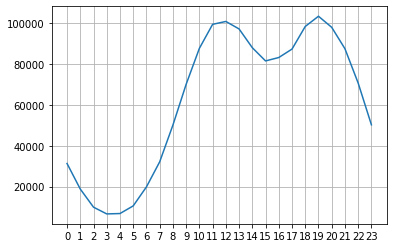

In [20]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [21]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [22]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('USB-C Charging Cable', 'USB-C Charging Cable') 616356
('Lightning Charging Cable', 'Lightning Charging Cable') 609880
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 581020
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 578396
('Wired Headphones', 'Wired Headphones') 530936
('Apple Airpods Headphones', 'Apple Airpods Headphones') 436908
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 374828
('27in FHD Monitor', '27in FHD Monitor') 210772
('iPhone', 'iPhone') 191704
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 174760


#### What product sold the most? Why do you think it sold the most?

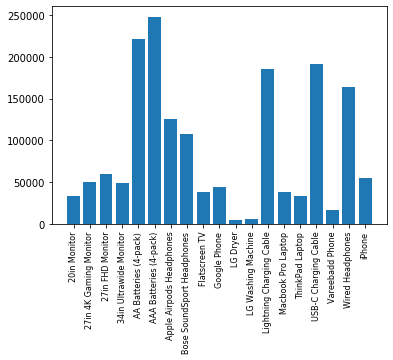

In [23]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

/home/ifabiyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


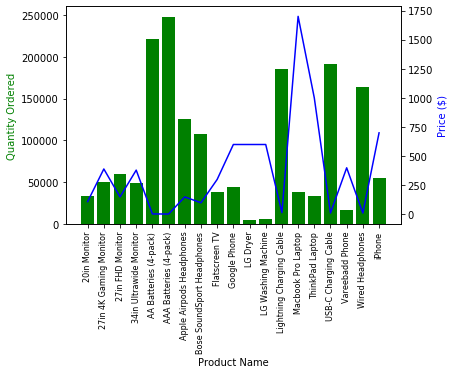

In [25]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()